**Introduction**

After looking atthe datasets provided by the WPDRC I decided that the three best metrics to use to determine the best neighborhood in Pittsburgh was:

1. Fire Incidents
2. Smart Trash Container Locations
3. Traffic Count

I chose to use fire incidents because a good neighborhood generally should not be on fire. I chose to use the smart trash container locations because the more trash cans a neighborhood has the cleaner it should be. Finally, I chose to use the traffic count data because a good neighborhood should also have good drivers. If a neighborhood has bad drivers which often speed then that puts the person driving and pedestrians in the neighborhood at more risk.

**The Metric**

**Fire Incidents**

For the fire incidents data I decided to find the total number of fires in each neighborhood and then divide it by the population of that neighborhood to find the fire rate. Neighborhoods with a low fire rate were considered better whereas a neighborhood with a high fire rate were considered worse.

Winner: Mount Oliver Borough

Loser: Allegheny West

Did not consider neighborhoods like Chateau because the population was too low and the rate was very unrealistic.

**Smart Trash Cans**

The smart trash can data was pretty straightforward. Whichever neighborhood had the most trash cans in it was considered the best.

Winner: Shadyside

Had the most trash cans at 78. Not super surprising, Shadyside is not the largest neighborhood in Pittsburgh. However, it is one of the wealthier areas.

Loser: Tie between Northview Heights, Windgap, St. Clair, Swisshelm Park, Mt. Oliver, Oakwood, South Shore, and East Carnegie.

These areas only had one trash can. Probably because they are some of the smaller neighborhoods in Pittsburgh.

## The Best Neighborhood ##

Based on the data I believe the best neighborhood is Shadyside. I came to this conclusion because according to the bar graph below, Shadyside had the most trashcans which means that it is the cleanest neighborhood in Pittsburgh. Although it did not come in first place for the fire incident data, it still ranked #7 out of 90 neighborhoods. It also has the second largest population in Pittsburgh, and although it has one of the largest populations, it still has one of the lowest fire rates.

**Conclusion**

I have only been living in Pittsburgh for a semester, so my personal opinion on the best neighborhood does not hold much weight because I have not been to every neighborhood in Pittsburgh. However, I would agree with the data and say that Shadyside is the best neighborhood in Pittsburgh. I was somewhat surprised at the results because I have heard many times that Squirrel Hill North is the best. Shadyside is not my favorite neighborhood in Pittsburgh however. That title belongs to Southside. Although Southside did not do well according to the metric. It does contain the store Zeds which is one of my favorite stores in Pittsburgh. Walking around Southside is also very fun to me. I decided to leave out one dataset and only go with two because the third dataset that I chose, which was a dataset that measured traffic data, did not have enough data to represent a good idea of the best neighborhoods in Pittsburgh. It felt very rewarding to finally figure out the code for some of my datasets because it took me a very long time to generate the bar graphs and data frames.

### The Code ###

First import pandas and matplotlib

Then import all of the data spreadsheets which I used.

1. fireIncidents = Fire Incident Data
2. trashcan = Trashcan location data
3. trafficCount = Traffic count data
4. population = population data

In [18]:
import pandas as pd
%matplotlib inline

fireIncidents = pd.read_csv("FireIncidents.tsv", sep='\t')

trashcan = pd.read_csv("TrashcanData.tsv", sep='\t')

trafficCount = pd.read_csv("TrafficCountData.tsv", sep='\t')

population = pd.read_csv("Population.tsv", sep='\t')

**Fire Incident Data**

The code below calculates the fire rate for each neighborhood and shows the best neighborhoods in terms of fire rate.

In [21]:
fire = fireIncidents['neighborhood'].value_counts().sort_values(ascending=True)

fireData = pd.DataFrame(columns=['Neighborhood', 'Fire_Count', 'Points'])

fireRate = population.drop(['Margin of Error; Total', 'Estimate; Total'], axis=1)
fireRate['Population'] = population['Estimate; Total']
fireRate = fireRate.set_index('Neighborhood')
fireRate['Total_Fires'] = fireIncidents.groupby('neighborhood').size()
fireRate['Total_Rate'] = fireRate.apply(lambda row: row.Total_Fires / row.Population, axis=1)
fireRate.sort_values(by=['Total_Rate'], ascending=True).head(40)

,Id,Population,Total_Fires,Total_Rate
Neighborhood,,,,
Mount Oliver Borough,53,3399,6,0.001765
Regent Square,67,1033,6,0.005808
Westwood,90,3537,22,0.006220
Highland Park,40,6810,60,0.008811
Morningside,52,3262,29,0.008890
Squirrel Hill North,77,11336,102,0.008998
Stanton Heights,80,4761,47,0.009872
Shadyside,69,13562,140,0.010323
Swisshelm Park,83,1345,14,0.010409


The code below prints the worst neighborhoods in terms of fire rate. Disregard North Shore, South Shore and Chateau.

In [12]:
fireRate.sort_values(by=['Total_Rate'], ascending=True).tail(10)

,Id,Population,Total_Fires,Total_Rate
Neighborhood,,,,
Strip District,81,747,41,0.054886
Esplen,31,309,18,0.058252
Homewood South,42,2276,144,0.063269
Beltzhoover,9,1702,108,0.063455
Larimer,45,1641,112,0.068251
West End,88,235,17,0.072340
Allegheny West,2,343,34,0.099125
North Shore,58,205,53,0.258537
South Shore,72,12,19,1.583333


**Trash Can Data**

Pretty straightforward. Each row in the dataset was equal to one trashcan. The code below reads in all the values of the neighborhood in the dataset and counts how many time each neighborhood appears, and plots it on a bar graph.

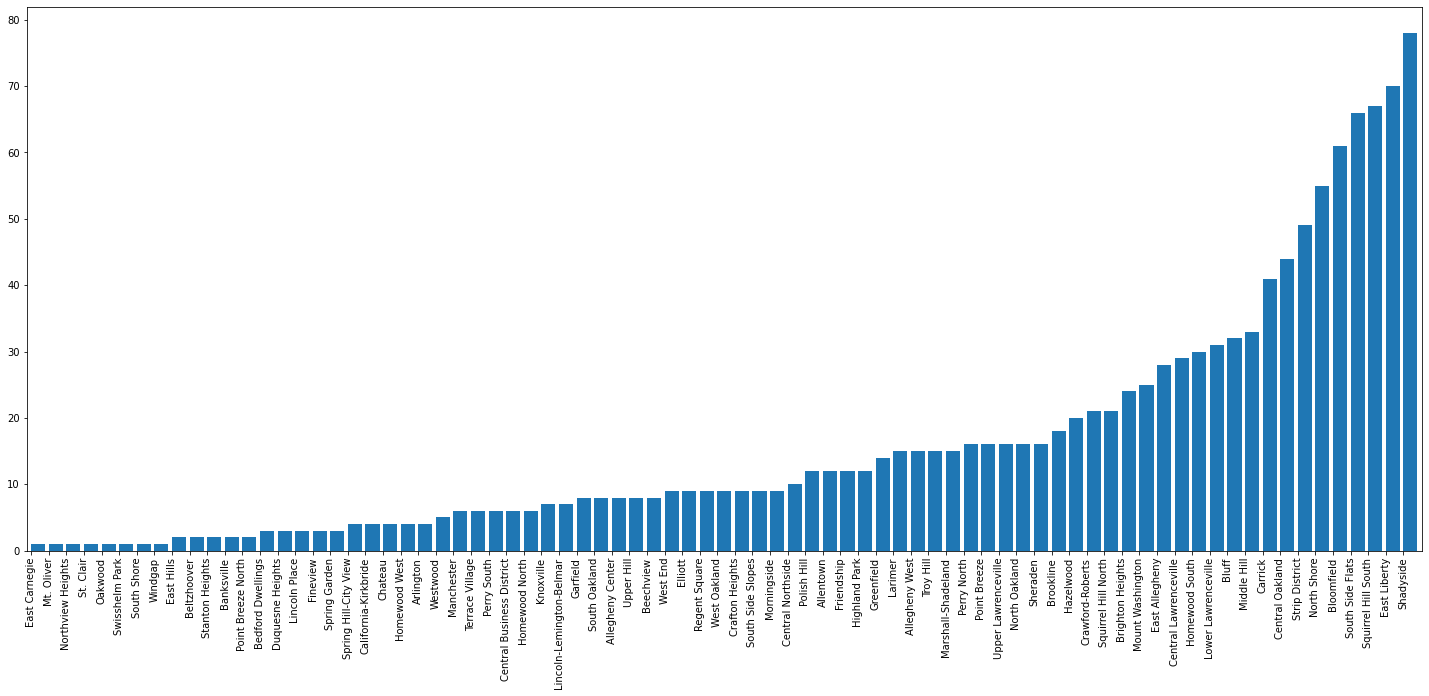

In [9]:
trash = pd.DataFrame(trashcan['neighborhood'],columns=['Neighborhood', 'Trashcan_Count'])
trashcans.plot(kind="bar", width=.8, figsize=(25,10), position=0)